In [1]:
import pickle as pkl
import matplotlib.pyplot as plt
from matplotlib import style
import os 
os.chdir(os.path.dirname(os.getcwd()))
import pandas as pd
import pickle as pkl
style.use('ggplot')
%matplotlib inline

In [6]:
#temperatures = pkl.load(open('data/output/temperatures_LR_0.1_GAMMA_0.99.pkl', "rb"))
temperatures = pkl.load(open('data/output/temperatures0.1_G_0.99_EPS_0.2_cycle_.pkl', "rb"))

temperatures_df = pd.DataFrame()
temperatures_df['trained'] = temperatures[-1]
temperatures_df['untrained'] = temperatures[0]
temperatures_df['hour'] = pd.to_timedelta(temperatures_df.index, unit='s')


In [7]:
temperatures_df.index = temperatures_df['hour']

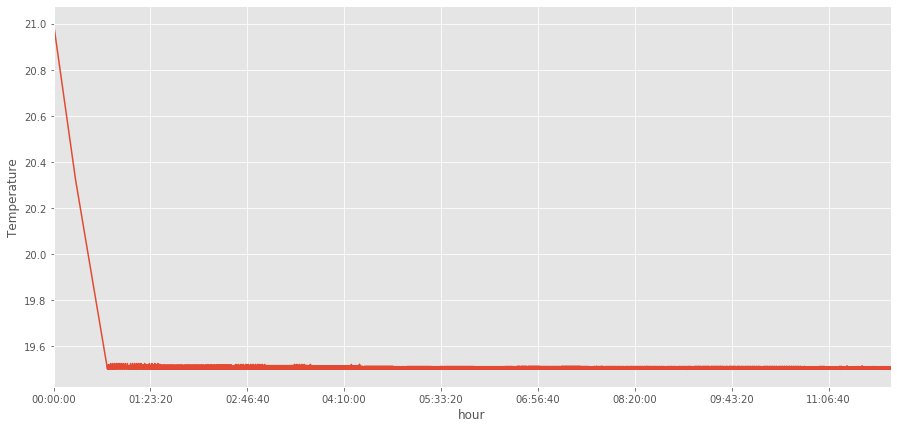

In [8]:
f, ax = plt.subplots(figsize=(15,7))

plt.ylabel('Temperature')
temperatures_df.loc[:,'trained'].plot(ax=ax)

plt.savefig('data/output/temperatures_cycle_constraint.png')

In [2]:
#rewards = pkl.load(open('data/output/rewards_LR_0.1_GAMMA_0.99.pkl', "rb"))
rewards = pkl.load(open('data/output/rewards_LR_0.1_G_0.99_EPS_0.2_cycle_.pkl', "rb"))

rewards_df = pd.DataFrame()
rewards_df['reward'] = rewards

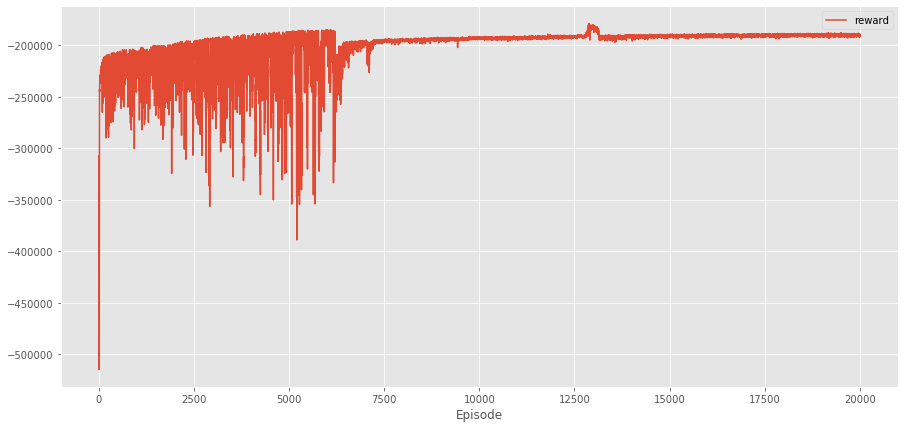

In [5]:
f, ax = plt.subplots(figsize=(15,7))
rewards_df.plot(ax=ax)
plt.xlabel('Episode')
plt.savefig('data/output/rewards_cycle_constraint.png')

In [4]:
rewards[-1]

-190420

In [49]:
temperatures = pkl.load(open('data/output/temperatures_basic.pkl', "rb"))

temperatures_df = pd.DataFrame()
temperatures_df['trained'] = temperatures
temperatures_df['hour'] = pd.to_timedelta(temperatures_df.index, unit='s')

In [50]:
temperatures_df.index = temperatures_df['hour']

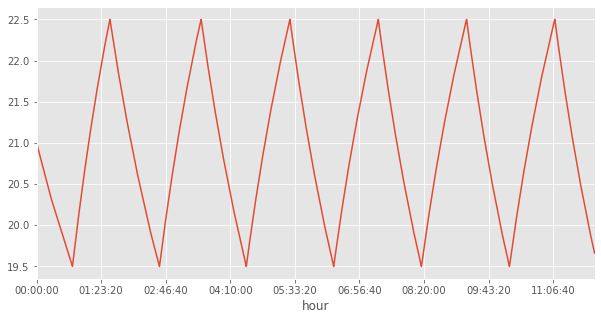

In [27]:
plt.figure(figsize=(10,5))
temperatures_df.loc[temperatures_df['hour'] < pd.to_timedelta(43200, unit='s'),'trained'].plot()

In [ ]:
f, ax = plt.subplots(figsize=(15,7))

plt.ylabel('Temperature')
temperatures_df['trained'].plot(ax=ax)

plt.savefig('data/output/temperatures_basic_controller.png')

In [53]:
rewards = pkl.load(open('data/output/rewards_basic.pkl', "rb"))

rewards_df = pd.DataFrame()
rewards_df['reward'] = rewards

In [54]:
sum(rewards)

-199710

# The learned policy 

In [56]:
q_table = pkl.load(open('q_table_no_cycle.pkl', "rb"))

In [61]:
import numpy as np
policy = {k: np.argmax(v) for k, v in q_table.items()} 

In [68]:
for t in np.arange(19.5, 23, 1/10):
    print('Temperature {} --> action {}'.format(np.round(t, decimals = 1),policy[np.round(t, decimals = 1)]))

Temperature 19.5 --> action 1
Temperature 19.6 --> action 0
Temperature 19.7 --> action 0
Temperature 19.8 --> action 1
Temperature 19.9 --> action 0
Temperature 20.0 --> action 0
Temperature 20.1 --> action 0
Temperature 20.2 --> action 0
Temperature 20.3 --> action 0
Temperature 20.4 --> action 0
Temperature 20.5 --> action 0
Temperature 20.6 --> action 0
Temperature 20.7 --> action 0
Temperature 20.8 --> action 0
Temperature 20.9 --> action 0
Temperature 21.0 --> action 0
Temperature 21.1 --> action 1
Temperature 21.2 --> action 0
Temperature 21.3 --> action 1
Temperature 21.4 --> action 1
Temperature 21.5 --> action 0
Temperature 21.6 --> action 1
Temperature 21.7 --> action 1
Temperature 21.8 --> action 0
Temperature 21.9 --> action 0
Temperature 22.0 --> action 1
Temperature 22.1 --> action 0
Temperature 22.2 --> action 1
Temperature 22.3 --> action 0
Temperature 22.4 --> action 0
Temperature 22.5 --> action 1
Temperature 22.6 --> action 0
Temperature 22.7 --> action 0
Temperatur

# DQN Agent

## No dynamic outside parameters

In [23]:
rewards = pkl.load(open('data/output/basic/3163795_dynamic_False_rewards_dqn.pkl', "rb"))

In [24]:
rewards[-1]

{'NUM_EPISODES': 1000,
 'EPSILON': 1,
 'EPS_DECAY': 0.9998,
 'LEARNING_RATE': 0.00025,
 'GAMMA': 0.99,
 'TARGET_UPDATE': 10,
 'BATCH_SIZE': 32,
 'TIME_STEP_SIZE': 600,
 'NUM_HOURS': 744,
 'E_PRICE': 1,
 'COMFORT_PENALTY': 10}

In [25]:
rewards_df = pd.DataFrame()
rewards_df['reward'] = rewards[:-1]

In [29]:
r = rewards_df.fillna(rewards_df.mean())

In [30]:
moving_avg = r.rolling(window=10).mean()

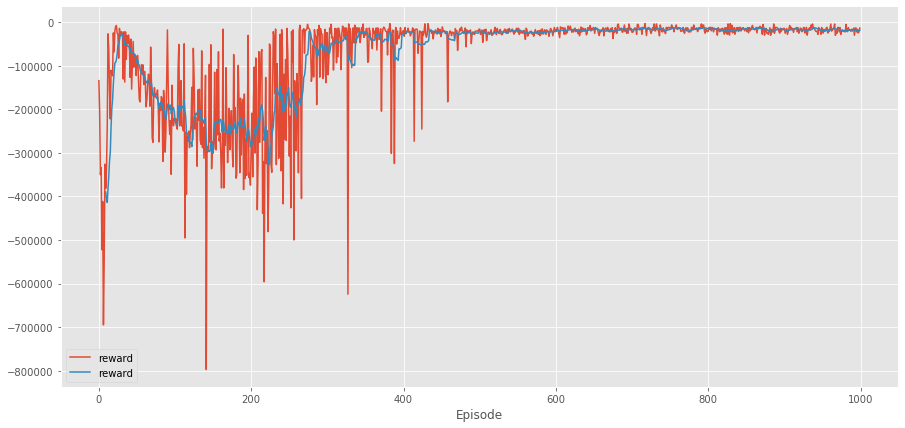

In [31]:
f, ax = plt.subplots(figsize=(15,7))
r.plot(ax=ax)
moving_avg.plot(ax=ax)
plt.xlabel('Episode')
plt.savefig('data/output/rewards_not_dynamic_dqn.png')

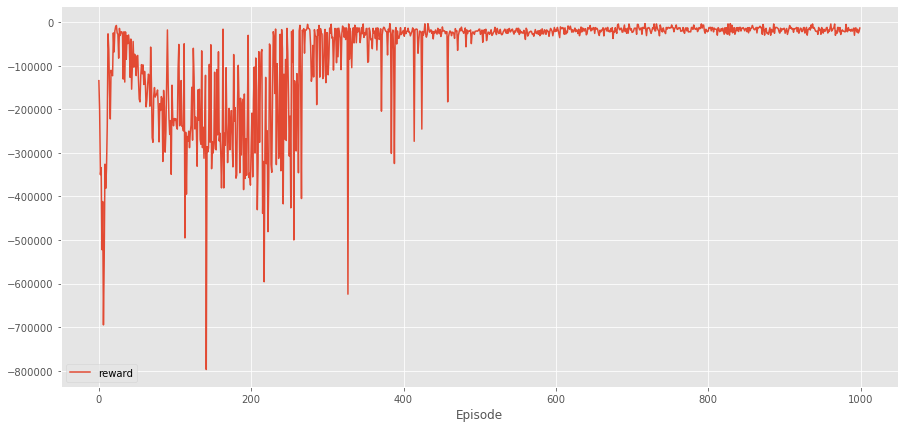

In [26]:
f, ax = plt.subplots(figsize=(15,7))
rewards_df.plot(ax=ax)
plt.xlabel('Episode')
plt.savefig('data/output/rewards_no_dynamic_dqn.png')

In [27]:
temperatures = pkl.load(open('data/output/basic/3163795_dynamic_False_temperatures_dqn.pkl', "rb"))

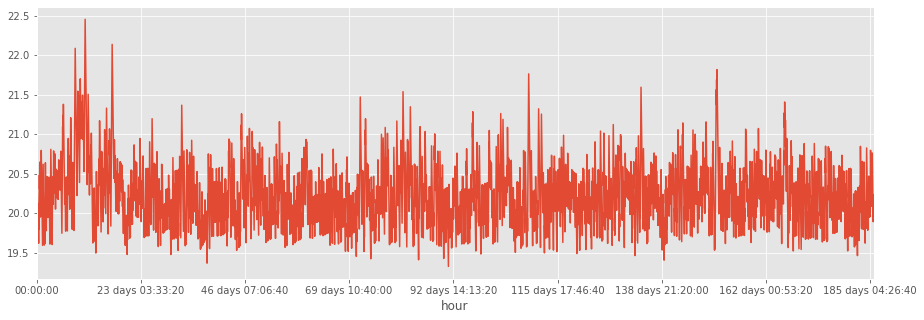

In [28]:
temperatures_df = pd.DataFrame()
temperatures_df['trained'] = temperatures[-2]
temperatures_df['hour'] = pd.to_timedelta(temperatures_df.index, unit='h')

temperatures_df.index = temperatures_df['hour']

plt.figure(figsize=(15,5))
temperatures_df.iloc[:,:].loc[:,'trained'].plot()

## Dynamic outside parameters

In [3]:
rewards = pkl.load(open('data/output/DQN-Dyn-Weather/2710092_dynamic_True_rewards_dqn.pkl', "rb"))

In [4]:
rewards[-1]

{'NUM_EPISODES': 1000,
 'EPSILON': 1,
 'EPS_DECAY': 0.9998,
 'LEARNING_RATE': 0.00025,
 'GAMMA': 0.99,
 'TARGET_UPDATE': 10,
 'BATCH_SIZE': 32,
 'TIME_STEP_SIZE': 600,
 'NUM_HOURS': 744,
 'E_PRICE': 1,
 'COMFORT_PENALTY': 2}

In [4]:
rewards_df = pd.DataFrame()
rewards_df['reward'] = rewards[:-1]

In [6]:
r = rewards_df.fillna(rewards_df.mean())

In [7]:
moving_avg = r.rolling(window=10).mean()

Text(0.5, 0, 'Episode')

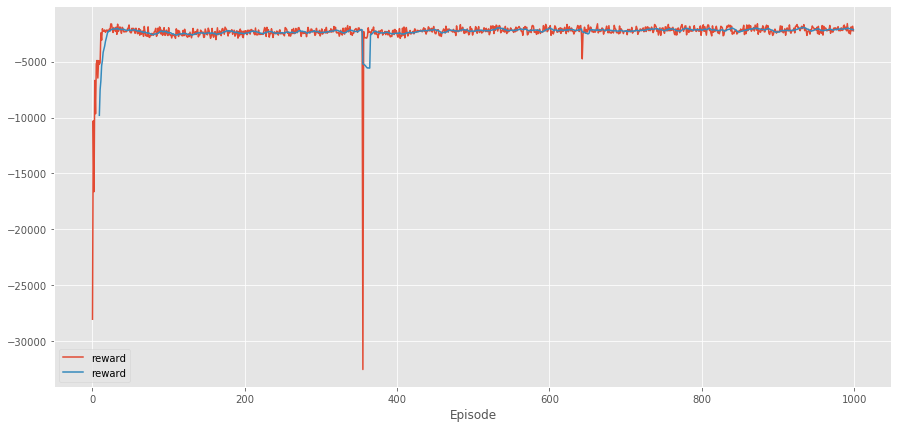

In [8]:
f, ax = plt.subplots(figsize=(15,7))
r.plot(ax=ax)
moving_avg.plot(ax=ax)
plt.xlabel('Episode')
#plt.savefig('data/output/rewards_dynamic_dqn.png')

In [10]:
temperatures = pkl.load(open('data/output/DQN-Dyn-Weather/2622882_dynamic_True_temperatures_dqn.pkl', "rb"))

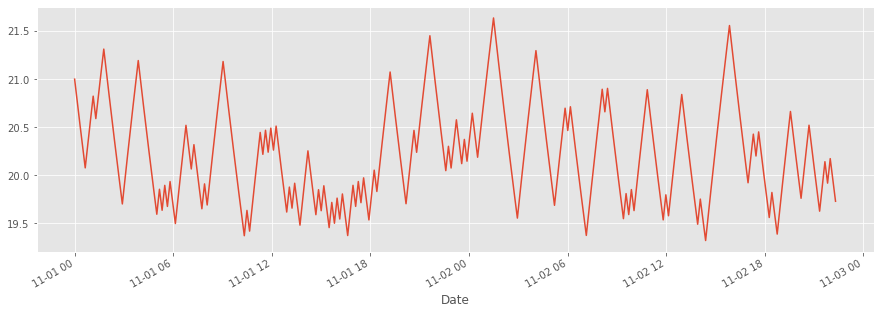

In [33]:
temperatures_df = pd.DataFrame()
temperatures_df['trained'] = temperatures[-3]
temperatures_df['Date'] = pd.date_range(start='2014-11-01',end='2014-12-01', periods=len(temperatures_df['trained']))

temperatures_df.index = temperatures_df['Date']

plt.figure(figsize=(15,5))
temperatures_df.iloc[:48*6,:].loc[:,'trained'].plot()

In [11]:
temperatures[-1]

{'NUM_EPISODES': 2000,
 'EPSILON': 1,
 'EPS_DECAY': 0.9998,
 'LEARNING_RATE': 0.0001,
 'GAMMA': 0.99,
 'TARGET_UPDATE': 10,
 'BATCH_SIZE': 32,
 'TIME_STEP_SIZE': 600,
 'NUM_HOURS': 744,
 'E_PRICE': 1,
 'COMFORT_PENALTY': 2}

### Evaluation on January

In [2]:
eval_data = pkl.load(open('data/output/DQN-Dyn-Weather/Dyn_Weather_eval.pkl', 'rb'))
eval_data['Date'] = pd.date_range(start='2014-01-01',end='2014-02-01', periods=len(eval_data))
eval_data.index = eval_data['Date']

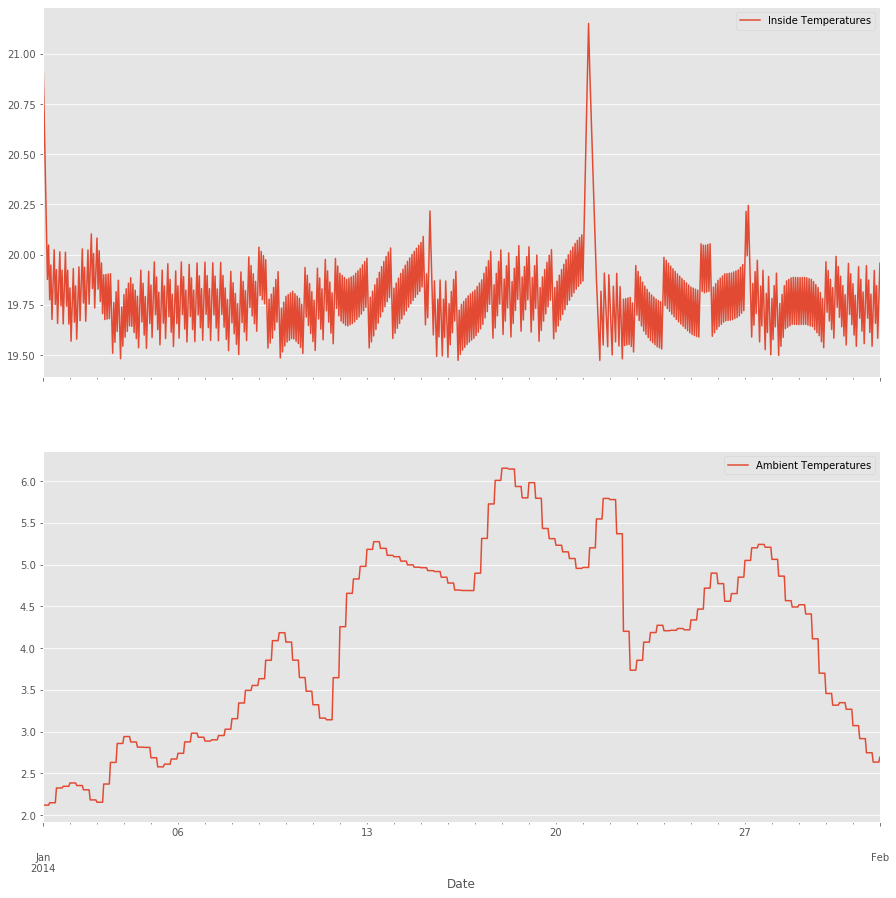

In [4]:
fig, axs = plt.subplots(2,figsize=(15,15), sharex=True)

eval_data['Inside Temperatures'].plot(ax=axs[0], legend=True)
eval_data['Ambient Temperatures'].plot(ax=axs[1], legend=True)
plt.savefig('data/output/DQN-Dyn-Weather/EvalSingleWeather.png',bbox_inches='tight')

### With Dynamic price

In [8]:
rewards = pkl.load(open('data/output/DQN-Dyn-Price/2710188_dynamic_True_rewards_dqn.pkl', "rb"))

In [9]:
rewards[-1]

{'NUM_EPISODES': 1000,
 'EPSILON': 1,
 'EPS_DECAY': 0.9998,
 'LEARNING_RATE': 0.00025,
 'GAMMA': 0.99,
 'TARGET_UPDATE': 10,
 'BATCH_SIZE': 32,
 'TIME_STEP_SIZE': 600,
 'NUM_HOURS': 744,
 'E_PRICE': 1,
 'COMFORT_PENALTY': 2}

In [10]:
rewards_df = pd.DataFrame()
rewards_df['reward'] = rewards[:-1]

In [11]:
r = rewards_df.fillna(rewards_df.mean())

In [12]:
moving_avg = r.rolling(window=10).mean()

In [13]:
moving_avg = moving_avg.rename(columns={'reward':'moving average'})

Text(0.5, 0, 'Episode')

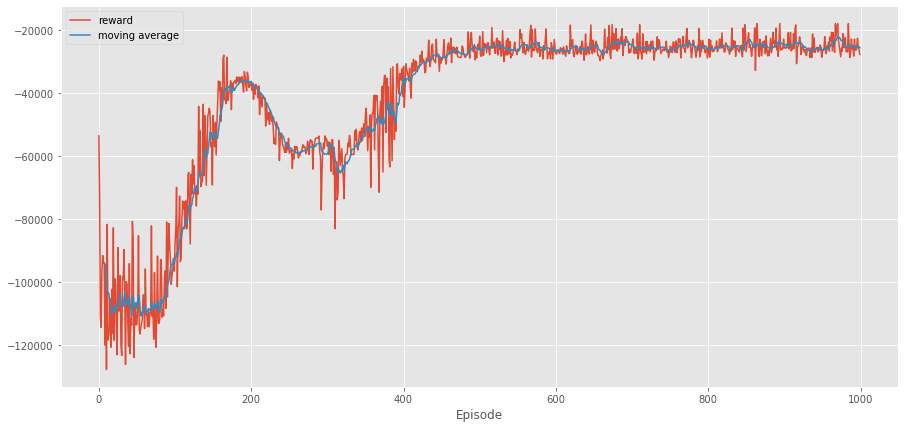

In [14]:
f, ax = plt.subplots(figsize=(15,7))
r.plot(ax=ax)
moving_avg.plot(ax=ax)
plt.xlabel('Episode')
#plt.savefig('data/output/rewards_dynamic_dqn.png')

In [19]:
temperatures = pkl.load(open('data/output/DQN-Dyn-Price/2650677_dynamic_True_temperatures_dqn.pkl', "rb"))

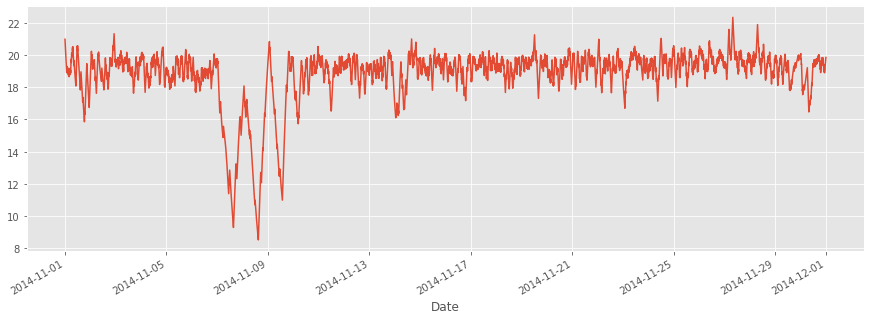

In [24]:
temperatures_df = pd.DataFrame()
temperatures_df['trained'] = temperatures[-2]
temperatures_df['Date'] = pd.date_range(start='2014-11-01',end='2014-12-01', periods=len(temperatures_df['trained']))

temperatures_df.index = temperatures_df['Date']

plt.figure(figsize=(15,5))
temperatures_df.iloc[:,:].loc[:,'trained'].plot()

### Evaluation on January

In [46]:
eval_data = pkl.load(open('data/output/DQN-Dyn-Price/Dyn_Prices_eval.pkl', 'rb'))

In [47]:
eval_data['Date'] = pd.date_range(start='2014-01-01',end='2014-02-01', periods=len(eval_data))
eval_data.index = eval_data['Date']

In [48]:
eval_data

,Inside Temperatures,Ambient Temperatures,Prices,Actions,Rewards,Date
Date,,,,,,
2014-01-01 00:00:00,21.000000,2.118,15.15,0.0,0.000000,2014-01-01 00:00:00
2014-01-01 01:00:00,20.712611,2.118,15.15,0.0,-0.000000,2014-01-01 01:00:00
2014-01-01 02:00:00,20.429595,2.118,15.15,0.0,-0.000000,2014-01-01 02:00:00
2014-01-01 03:00:00,20.150888,2.118,15.15,0.0,-0.000000,2014-01-01 03:00:00
2014-01-01 04:00:00,20.317702,2.118,15.15,1.0,-5.050000,2014-01-01 04:00:00
...,...,...,...,...,...,...
2014-01-31 20:00:00,20.793879,2.634,5.09,1.0,-1.696667,2014-01-31 20:00:00
2014-01-31 21:00:00,20.963796,2.634,5.09,1.0,-1.696667,2014-01-31 21:00:00
2014-01-31 22:00:00,20.684812,2.634,5.09,0.0,-0.000000,2014-01-31 22:00:00


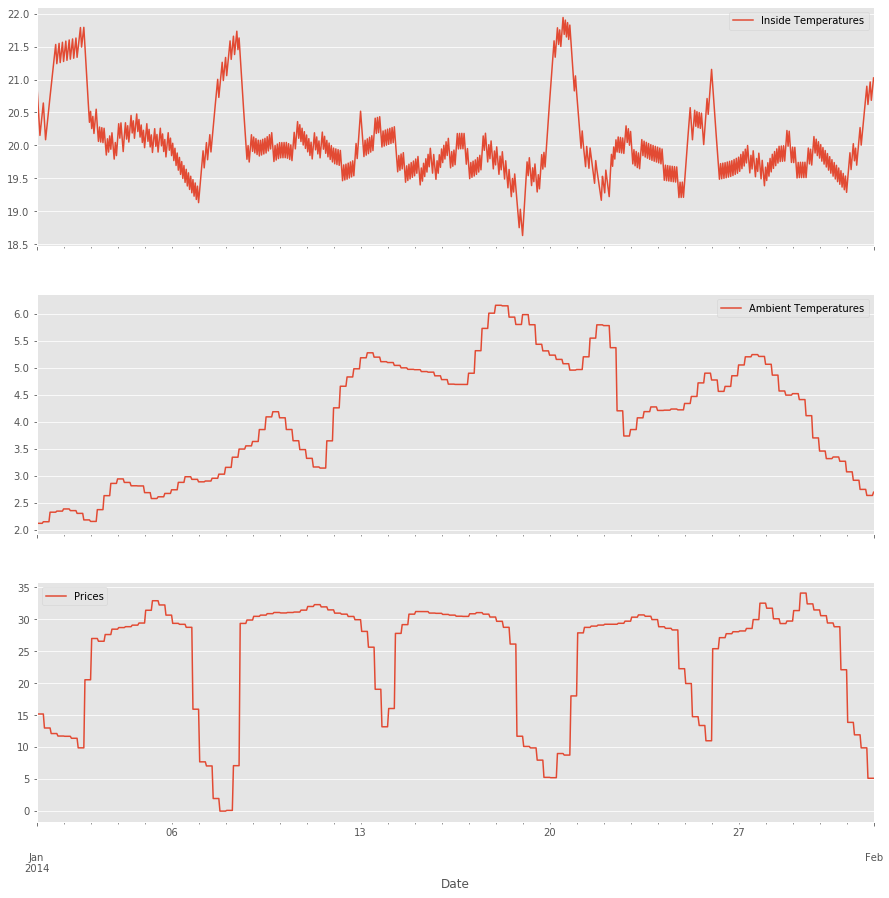

In [57]:
fig, axs = plt.subplots(3,figsize=(15,15), sharex=True)

eval_data['Inside Temperatures'].plot(ax=axs[0], legend=True)
eval_data['Ambient Temperatures'].plot(ax=axs[1], legend=True)
eval_data['Prices'].plot(ax=axs[2], legend=True)
plt.savefig('data/output/DQN-Dyn-Price/eval.png',bbox_inches='tight')

# DDPG

In [77]:
rewards = pkl.load(open('data/output/DDPG/3238021_dynamic_True_rewards_dqn.pkl', "rb"))

In [78]:
rewards[-1]

{'NUM_EPISODES': 4000,
 'EPSILON': 1,
 'EPS_DECAY': 0.9998,
 'LEARNING_RATE_ACTOR': 0.0001,
 'LEARNING_RATE_CRITIC': 0.001,
 'GAMMA': 0.99,
 'TARGET_UPDATE': 10,
 'BATCH_SIZE': 8,
 'TIME_STEP_SIZE': 600,
 'NUM_HOURS': 24,
 'COMFORT_PENALTY': 10,
 'MEMORY_SIZE': 144000}

In [79]:
rewards_df = pd.DataFrame()
rewards_df['reward'] = rewards[:-1]

In [80]:
r = rewards_df.fillna(rewards_df.mean())

In [81]:
moving_avg = r.rolling(window=10).mean()

In [82]:
moving_avg = moving_avg.rename(columns={'reward':'moving average'})

Text(0.5, 0, 'Episode')

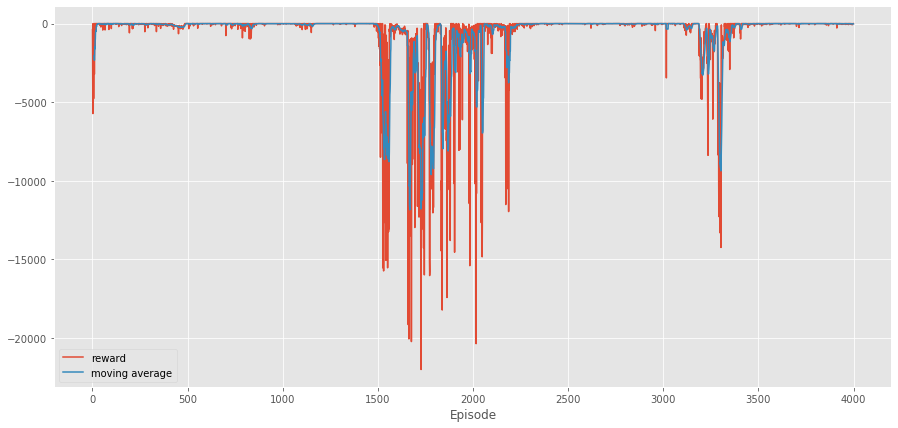

In [83]:
f, ax = plt.subplots(figsize=(15,7))
r.plot(ax=ax)
moving_avg.plot(ax=ax)
plt.xlabel('Episode')
#plt.savefig('data/output/rewards_dynamic_dqn.png')

In [84]:
eval_data = pkl.load(open('data/output/DDPG/DDPG_eval_eval.pkl', 'rb'))

In [85]:
eval_data['Date'] = pd.date_range(start='2014-01-01',end='2014-02-01', periods=len(eval_data))
eval_data.index = eval_data['Date']

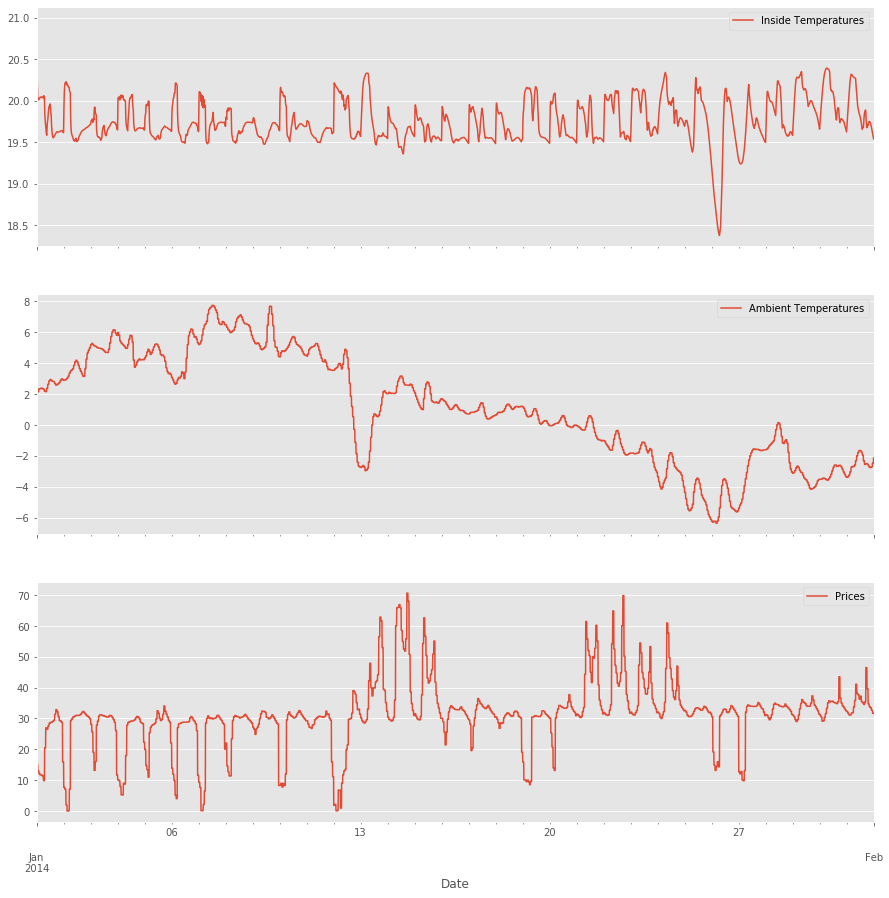

In [89]:
fig, axs = plt.subplots(3,figsize=(15,15), sharex=True)

eval_data['Inside Temperatures'].plot(ax=axs[0], legend=True)
eval_data['Ambient Temperatures'].plot(ax=axs[1], legend=True)
eval_data['Prices'].plot(ax=axs[2], legend=True)
plt.savefig('data/output/DDPG/DDPG_eval.png',bbox_inches='tight')

In [87]:
costs_ddpg = sum(2000*eval_data['Prices']/1e6*eval_data['Actions']*10*60/3600)

In [88]:
costs_ddpg

30.172001754492214